# **PENAMBANGAN DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **TUGAS 1**

### 1. Mengimport dan membaca data dari url

In [ ]:
#membaca data dari url
import pandas as pd
url = "https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv"
df = pd.read_csv(url)
df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


### 2. Mengolah data numeric ke bentuk statistik deskriptif

Statistik deskriptif adalah metode yang berkaitan dengan pengumpulan / penyajian data hingga memberi informasi yang berguna.

In [ ]:
#mengambil data dari beberapa kolom
#nmr = df [["bp_before","bp_after"]]
#nmr = df ['bp_after']
#nmr

0      153
1      170
2      168
3      142
4      141
      ... 
115    152
116    152
117    174
118    151
119    163
Name: bp_after, Length: 120, dtype: int64



**Mean (rata-rata)**

* Data Tunggal

  $$
\begin{align*}
\displaystyle\bar x &= \frac{x_{1} + x_{2} + x_{3} + ... + x_{n}}{n} \\
  keterangan &: \\
\bar x &=\ Rata-rata \\
x_{1} + x_{2} + x_{3} + ... + x_{n} &=\ Nilai \  data \\
n &=\ Banyaknya \ data
\end{align*}
$$

* Data kelompok

  Mean data kelompok artinya data memiliki pengelompokkan dalam interval-interval kelas yang sama panjang. Untuk mengetahui nilai mediannya dapat ditentukan dengan rumus berikut ini.

$$
\begin{align*}
\displaystyle
\bar x &= \frac{\sum f_{i}x_{i}}{n} \\
keterangan &: \\
\bar x &=\ Rata-rata \\
f_{i} &=\ Frekuensi \\
x_{i} &=\ Nilai \ tengah \\
n &=\ Total \ frekuensi \ atau \ data
\end{align*}
$$



**Median (nilai tengah)**

* Data Tunggal

  $$
\begin{align*}
\displaystyle
Jumlah \ data \ ganjil &: \\
M_{e} &= \frac{X_{(n -1)}}{2} \\
Jumlah \ data \ genap &: \\
M_{e} &= \frac{X_{(\frac{n}{2})}+X_{(\frac{n}{2}+1)}}{2}
\end{align*}
$$

* Data Kelompok

  Median data kelompok artinya data dikelompokkan dalam interval-interval kelas yang sama panjang. Untuk mengetahui nilai mediannya dapat ditentukan dengan rumus berikut ini.

$$
\begin{align*}
\displaystyle
M_{e} &= L + c\left( \frac{\frac{1}{2}n - f_{k}}{\sum f_{i}} \right)
\end{align*}
$$



**Modus (data yang sering muncul)**

* Data Kelompok

  Modus data kelompok Modus data kelompok dirumuskan sebagai berikut:

  $$
\begin{align*}
\displaystyle
M_{o} &= L + c\left( \frac{d_{1}}{d_{1} + d_{2}} \right)c \\
\end{align*}
$$


**Kuartil**
  
  Kuartil adalah membagi data yang telah diurutkan menjadi empat bagian yang sama banyak. Kuartil data tunggal Urutkan data dari yang kecil ke yang besar, kemudian tentukan kuartil dengan rumus sebagai berikut: 

$$
\begin{align*}
\displaystyle
Q_{i} &= \frac{i\left( n + 1 \right)}{4}
\end{align*}
$$




**Jangkauan**

  Apabila sekumpulan data sudah diurutkan dari yang terkecil sampai terbesar maka Range dari data itu adalah
<br>

  Range = data terbesar – data terkecil

  Contohnya tentukan range dari data 15, 20, 25 , 35, 40, 43, 50!

  Cara menjawabnya:
  Data terbesarnya = 50
  Data terkecilnya = 15

  Range = 50 – 15 = 35

$$
\begin{align*}
\displaystyle
J &= X_{max} - X_{min}
\end{align*}
$$

    



**Simpangan Baku**

$$
\begin{align*}
\displaystyle
Data \ Populasi &: \\
s &= \sqrt{\frac{\sum_{i=1}^{n}\left( x_{i} - \bar x \right)^{2}}{n}} \\
Data \ Sampel &: \\
s &= \sqrt{\frac{\sum_{i=1}^{n}\left( x_{i} - \bar x \right)^{2}}{n-1}}
\end{align*}
$$


In [ ]:
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# menentukan dataframe
xy = df['bp_before']

# mean
mean = xy.mean()
print('Mean: ',mean)

#median
median = xy.median() 
print('Median: ',median)

#modus
modus = xy.mode()
print('Modus: ',modus[0])

#kuartil
kuartil=xy.quantile() 
print('Kuartil: ', kuartil)

# Kuartil ke-1
q1 = np.percentile(xy, 25)
print('kuartil ke-1 = ', q1)

# Kuartil ke-2
q2 = np.percentile(xy, 50)
print('kuartil ke-2 = ', q2)

# Kuartil ke-3
q3 = np.percentile(xy, 75)
print('kuartil ke-3 = ', q3)

#desil
D = np.percentile(xy, np.arange(0, 100, 10))
for ind, data in enumerate(D):
  print(f'Desil ke-{ind+1} = {data}')

# rumus jangkauan J = Xn - X1
Xn = max(xy)
X1 = min(xy)
J = Xn - X1
print(f'Jangkauan data = {J}')

#simpangan baku
s = st.pstdev(xy)
print(f'Simpangan baku = {s}')


Mean:  156.45
Median:  154.5
Modus:  142
Kuartil:  154.5
kuartil ke-1 =  147.0
kuartil ke-2 =  154.5
kuartil ke-3 =  164.0
Desil ke-1 = 138.0
Desil ke-2 = 142.9
Desil ke-3 = 145.8
Desil ke-4 = 149.0
Desil ke-5 = 151.6
Desil ke-6 = 154.5
Desil ke-7 = 158.39999999999998
Desil ke-8 = 162.0
Desil ke-9 = 167.0
Desil ke-10 = 172.10000000000002
Jangkauan data = 47
Simpangan baku = 11.342288128944706


In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# menentukan dataframe
xy = df['bp_after']

# mean
mean = xy.mean()
print('Mean: ',mean)

#median
median = xy.median() 
print('Median: ',median)

#modus
modus = xy.mode()
print('Modus: ',modus[0])

#kuartil
kuartil=xy.quantile() 
print('Kuartil: ', kuartil)

# Kuartil ke-1
q1 = np.percentile(xy, 25)
print('kuartil ke-1 = ', q1)

# Kuartil ke-2
q2 = np.percentile(xy, 50)
print('kuartil ke-2 = ', q2)

# Kuartil ke-3
q3 = np.percentile(xy, 75)
print('kuartil ke-3 = ', q3)

#desil
D = np.percentile(xy, np.arange(0, 100, 10))
for ind, data in enumerate(D):
  print(f'Desil ke-{ind+1} = {data}')

# rumus jangkauan J = Xn - X1
Xn = max(xy)
X1 = min(xy)
J = Xn - X1
print(f'Jangkauan data = {J}')

#simpangan baku
s = st.pstdev(xy)
print(f'Simpangan baku = {s}')

Mean:  151.35833333333332
Median:  149.5
Modus:  135
Kuartil:  149.5
kuartil ke-1 =  140.75
kuartil ke-2 =  149.5
kuartil ke-3 =  161.0
Desil ke-1 = 125.0
Desil ke-2 = 134.0
Desil ke-3 = 137.8
Desil ke-4 = 142.7
Desil ke-5 = 146.6
Desil ke-6 = 149.5
Desil ke-7 = 153.0
Desil ke-8 = 159.0
Desil ke-9 = 163.2
Desil ke-10 = 170.10000000000002
Jangkauan data = 60
Simpangan baku = 14.118425215141935


### 3. Mendeskripsikan kemiringan data/ skewned

Kemencengan atau kecondongan (skewness) adalah tingkat ketidaksimetrisan atau kejauhan simetri dari sebuah distribusi. Skewness diartikan sebagai kemiringan distribusi data. Sebuah distribusi yang tidak simetris akan memiliki rata-rata, median, dan modus yang tidak sama besarnya sehingga distribusi akan terkonsentrasi pada salah satu sisi dan kurvanya akan menceng.

In [ ]:
#Mengecek type data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


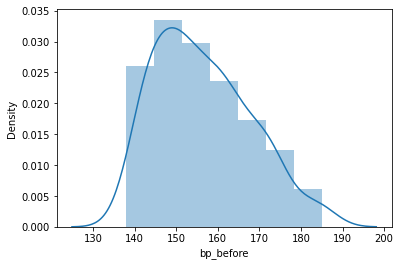

In [ ]:
nmr = df ['bp_before']
nmr.skew()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.distplot(nmr)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


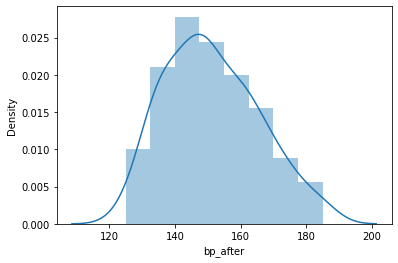

In [ ]:
nmr = df ['bp_after']
nmr.skew()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.distplot(nmr)
plt.show()

## TUGAS 2

Discretization atau binning digunakan untuk mengubah atribut numerik menjadi atribut kategorikal. Perubahan tersebut dilakukan dengan mengkategorikan atribut numerik menjadi beberapa tingkatan atribut kategorikal. Sebagai contoh, apabila terdapat data numerik dengan data berikut:

$$ 2, 4, 10, 17, 5, 23, 11, 48, 35, 56, 20$$

Maka, dengan discretization, data tersebut dapat dikategorikan menjadi dua kelompok:

$$Kelompok\ 1 (Dibawah\ 25): 2, 4, 5,10, 11, 17, 20, 23$$

$$Kelompok\ 2 (Diatas\ 25): 35, 48, 56$$

Mengubah data numerik menjadi kategorikal memungkinkan data tersebut untuk dianalisis dengan menggunakan analisis kategorikal. Sehingga, informasi baru bisa didapatkan dari data tersebut.

### 1. Diskritisasi dengan equal width dan equal frequency

In [ ]:
#Datasets iris
import pandas as pd
import numpy as np
from math import log2
import statistics as st
pd.options.mode.chained_assignment=None

url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data=pd.read_csv(url)
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# Kolom Data
panjang_sepal = data["sepal.length"]
lebar_sepal = data["sepal.width"]
panjang_petal = data["petal.length"]
lebar_petal = data["petal.width"]

#### a. Equal-width

Equal-width adalah algoritma untuk membagi rentang dari X menjadi k interval dengan ukuran lebar yang sama

Method cut digunakan untuk mencari interval menggunakan metode equal-width interval

```
# Syntax
pd.cut(series, interval, right=True, label)
```

sepal width berdasarkan lebar kelompak bunga iris dikelompokkan menjadi 3:
1.   sedikit lebar
2.   lebar
3.   sangat lebar



In [ ]:
# interval equal-width
# ew = equal-width

# label kategori
label = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
# Untuk menghitung banyaknya kategori label
jumlah_kategori = len(label)

# untuk menghitung interval equal-width
data_lebarsepal_ew = pd.cut(lebar_sepal, jumlah_kategori, True, label)
jumlahdata_kategori_lebarsepal_ew = data_lebarsepal_ew.value_counts()
jumlahdata_interval_lebarsepal_ew = pd.cut(lebar_sepal, jumlah_kategori, True).value_counts()

In [ ]:
# dataframe dari sepal.widht beserta kategorinya
# concat untuk menggabungkan beberapa kolom
df_lebarsepal_ew=pd.DataFrame(pd.concat((lebar_sepal, data_lebarsepal_ew), axis = 1))

In [ ]:
df_lebarsepal_ew.columns = ["sepal.width", "category"]
df_lebarsepal_ew

,sepal.width,category
0,3.5,Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
4,3.6,Lebar
...,...,...
145,3.0,Lebar
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Lebar


In [ ]:
#jumlah data sepal.width berdasarkan kategori
jumlahdata_kategori_lebarsepal_ew

Lebar            88
Sedikit Lebar    47
Sangat Lebar     15
Name: sepal.width, dtype: int64

In [ ]:
#jumlah data sepal.width berdasarkan interval
jumlahdata_interval_lebarsepal_ew

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: sepal.width, dtype: int64

sepal length berdasarkan panjang kelompak bunga iris dikelompokkan menjadi 3:
1.   sedikit lebar
2.   lebar
3.   sangat lebar



In [ ]:
# interval equal-width
# ew = equal-width

# label kategori
label = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
# Untuk menghitung banyaknya kategori label
jumlah_kategori = len(label)

# untuk menghitung interval equal-width
data_panjangsepal_ew = pd.cut(panjang_sepal, jumlah_kategori, True, label)
jumlahdata_kategori_panjangsepal_ew = data_panjangsepal_ew.value_counts()
jumlahdata_interval_panjangsepal_ew = pd.cut(panjang_sepal, jumlah_kategori, True).value_counts()

In [ ]:
# dataframe dari sepal.length beserta kategorinya
# concat untuk menggabungkan beberapa kolom
df_panjangsepal_ew=pd.DataFrame(pd.concat((panjang_sepal, data_panjangsepal_ew), axis = 1))

In [ ]:
df_panjangsepal_ew.columns = ["sepal.width", "category"]
df_panjangsepal_ew

,sepal.width,category
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
4,5.0,Sedikit Lebar
...,...,...
145,6.7,Lebar
146,6.3,Lebar
147,6.5,Lebar
148,6.2,Lebar


In [ ]:
#jumlah data sepal.length berdasarkan kategori
jumlahdata_kategori_panjangsepal_ew

Lebar            71
Sedikit Lebar    59
Sangat Lebar     20
Name: sepal.length, dtype: int64

In [ ]:
#jumlah data sepal.length berdasarkan interval
jumlahdata_interval_panjangsepal_ew

(5.5, 6.7]      71
(4.296, 5.5]    59
(6.7, 7.9]      20
Name: sepal.length, dtype: int64

petal width berdasarkan lebar mahkota bunga iris dikelompokkan menjadi 3:
1.   sedikit lebar
2.   lebar
3.   sangat lebar



In [ ]:
# interval equal-width
# ew = equal-width

# label kategori
label = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
# Untuk menghitung banyaknya kategori label
jumlah_kategori = len(label)

# untuk menghitung interval equal-width
data_lebarpetal_ew = pd.cut(lebar_petal, jumlah_kategori, True, label)
jumlahdata_kategori_lebarpetal_ew = data_lebarpetal_ew.value_counts()
jumlahdata_interval_lebarpetal_ew = pd.cut(lebar_petal, jumlah_kategori, True).value_counts()

In [ ]:
# dataframe dari petal.widht beserta kategorinya
# concat untuk menggabungkan beberapa kolom
df_lebarpetal_ew=pd.DataFrame(pd.concat((lebar_petal, data_lebarpetal_ew), axis = 1))

In [ ]:
df_lebarpetal_ew.columns = ["petal.width", "category"]
df_lebarpetal_ew

,petal.width,category
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [ ]:
#jumlah data petal.width berdasarkan kategori
jumlahdata_kategori_lebarpetal_ew

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.width, dtype: int64

In [ ]:
#jumlah data petal.width berdasarkan interval
jumlahdata_interval_lebarpetal_ew

(0.9, 1.7]       54
(0.0976, 0.9]    50
(1.7, 2.5]       46
Name: petal.width, dtype: int64

petal length berdasarkan panjang mahkota bunga iris dikelompokkan menjadi 3:
1.   sedikit lebar
2.   lebar
3.   sangat lebar



In [ ]:
# interval equal-width
# ew = equal-width

# label kategori
label = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
# Untuk menghitung banyaknya kategori label
jumlah_kategori = len(label)

# untuk menghitung interval equal-width
data_panjangpetal_ew = pd.cut(panjang_petal, jumlah_kategori, True, label)
jumlahdata_kategori_panjangpetal_ew = data_panjangpetal_ew.value_counts()
jumlahdata_interval_panjangpetal_ew = pd.cut(panjang_petal, jumlah_kategori, True).value_counts()

In [ ]:
# dataframe dari petal.length beserta kategorinya
# concat untuk menggabungkan beberapa kolom
df_panjangpetal_ew=pd.DataFrame(pd.concat((panjang_petal, data_panjangpetal_ew), axis = 1))

In [ ]:
df_panjangpetal_ew.columns = ["petal.width", "category"]
df_panjangpetal_ew

,petal.width,category
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
4,1.4,Sedikit Lebar
...,...,...
145,5.2,Sangat Lebar
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar


In [ ]:
#jumlah data petal.length berdasarkan kategori
jumlahdata_kategori_panjangpetal_ew

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [ ]:
#jumlah data petal.length berdasarkan interval
jumlahdata_interval_panjangpetal_ew

(2.967, 4.933]    54
(0.994, 2.967]    50
(4.933, 6.9]      46
Name: petal.length, dtype: int64

In [ ]:
panjang_sepal["Kategori"] = pd.cut(data["sepal.length"],3, labels = ['sedikit lebar','lebar','sangat lebar'])
lebar_sepal["Kategori"] = pd.cut(data["sepal.width"],3, labels = ['sedikit lebar','lebar','sangat lebar'])
panjang_petal['Kategori'] = pd.cut(data["petal.length"],3, labels = ['sedikit lebar','lebar','sangat lebar'])
lebar_petal['Kategori'] = pd.cut(data["petal.width"],3, labels = ['sedikit lebar','lebar','sangat lebar'])

equalWidth = pd.DataFrame([])
equalWidth["sepal.length"] = data["sepal.length"]
equalWidth['sepal_length_category'] = panjang_sepal["Kategori"]

equalWidth["sepal.width"] = data["sepal.width"]
equalWidth["sepal_width_category"] = lebar_sepal["Kategori"]

equalWidth["petal.length"] = data["petal.length"]
equalWidth["petal_length_category"] = panjang_petal["Kategori"]

equalWidth["petal.width"] = data["petal.width"]
equalWidth["petal_width_category"] = lebar_petal["Kategori"]

equalWidth["variety"] = data[["variety"]]

equalWidth

,sepal.length,sepal_length_category,sepal.width,sepal_width_category,petal.length,petal_length_category,petal.width,petal_width_category,variety
0,5.1,sedikit lebar,3.5,lebar,1.4,sedikit lebar,0.2,sedikit lebar,Setosa
1,4.9,sedikit lebar,3.0,lebar,1.4,sedikit lebar,0.2,sedikit lebar,Setosa
2,4.7,sedikit lebar,3.2,lebar,1.3,sedikit lebar,0.2,sedikit lebar,Setosa
3,4.6,sedikit lebar,3.1,lebar,1.5,sedikit lebar,0.2,sedikit lebar,Setosa
4,5.0,sedikit lebar,3.6,lebar,1.4,sedikit lebar,0.2,sedikit lebar,Setosa
...,...,...,...,...,...,...,...,...,...
145,6.7,lebar,3.0,lebar,5.2,sangat lebar,2.3,sangat lebar,Virginica
146,6.3,lebar,2.5,sedikit lebar,5.0,sangat lebar,1.9,sangat lebar,Virginica
147,6.5,lebar,3.0,lebar,5.2,sangat lebar,2.0,sangat lebar,Virginica
148,6.2,lebar,3.4,lebar,5.4,sangat lebar,2.3,sangat lebar,Virginica


#### b. Equal frekuensi interval

Equal frekuensi interval adalah algoritma untuk membagi rentang dari X menjadi rentang-rentang yang berisi nilai data yang kurang lebih nilainya sama

pandas menyediakan qcut untuk mencari nilai interval dari Equal-Frequency Intervals

```
# Syntax
pd.qcut(series, interval, label)
```

sepal width berdasarkan lebar kelopak bunga iris dikelompokkan menjadi 3:
1.   sedikit lebar
2.   lebar
3.   sangat lebar



In [ ]:
# interval equal-frequency
# ef = equal-frequency

# label kategori
label = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
# Untuk menghitung banyaknya kategori label
jumlah_kategori = len(label)

# untuk menghitung interval equal-frequency
data_lebarsepal_ef = pd.qcut(lebar_sepal, jumlah_kategori, label)
jumlahdata_kategori_lebarsepal_ef = data_lebarsepal_ef.value_counts()
jumlahdata_interval_lebarsepal_ef = pd.qcut(lebar_sepal, jumlah_kategori).value_counts()

In [ ]:
# dataframe dari sepal.widht beserta kategorinya
# concat untuk menggabungkan beberapa kolom
df_lebarsepal_ef=pd.DataFrame(pd.concat((lebar_sepal, data_lebarsepal_ef), axis = 1))

In [ ]:
df_lebarsepal_ef.columns = ["sepal.width", "category"]
df_lebarsepal_ef

,sepal.width,category
0,3.5,Sangat Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
4,3.6,Sangat Lebar
...,...,...
145,3.0,Lebar
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Sangat Lebar


In [ ]:
#jumlah data sepal.width berdasarkan kategori
jumlahdata_kategori_lebarsepal_ef

Sedikit Lebar    57
Lebar            50
Sangat Lebar     43
Name: sepal.width, dtype: int64

In [ ]:
#jumlah data sepal.width berdasarkan interval
jumlahdata_interval_lebarsepal_ef

(1.999, 2.9]    57
(2.9, 3.2]      50
(3.2, 4.4]      43
Name: sepal.width, dtype: int64

sepal length berdasarkan panjang kelopak bunga iris dikelompokkan menjadi 3:
1.   sedikit lebar
2.   lebar
3.   sangat lebar



In [ ]:
# interval equal-frequency
# ef = equal-frequency

# label kategori
label = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
# Untuk menghitung banyaknya kategori label
jumlah_kategori = len(label)

# untuk menghitung interval equal-frequency
data_panjangsepal_ef = pd.qcut(panjang_sepal, jumlah_kategori, label)
jumlahdata_kategori_panjangsepal_ef = data_panjangsepal_ef.value_counts()
jumlahdata_interval_panjangsepal_ef = pd.qcut(panjang_sepal, jumlah_kategori).value_counts()

In [ ]:
# dataframe dari sepal.length beserta kategorinya
# concat untuk menggabungkan beberapa kolom
df_panjangsepal_ef=pd.DataFrame(pd.concat((panjang_sepal, data_panjangsepal_ef), axis = 1))

In [ ]:
df_panjangsepal_ef.columns = ["sepal.width", "category"]
df_panjangsepal_ef

,sepal.width,category
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
4,5.0,Sedikit Lebar
...,...,...
145,6.7,Sangat Lebar
146,6.3,Lebar
147,6.5,Sangat Lebar
148,6.2,Lebar


In [ ]:
#jumlah data sepal.length berdasarkan kategori
jumlahdata_kategori_panjangsepal_ef

Lebar            56
Sedikit Lebar    52
Sangat Lebar     42
Name: sepal.length, dtype: int64

In [ ]:
#jumlah data sepal.length berdasarkan interval
jumlahdata_interval_panjangsepal_ef

(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: sepal.length, dtype: int64

petal width berdasarkan lebar mahkota bunga iris dikelompokkan menjadi 3:
1.   sedikit lebar
2.   lebar
3.   sangat lebar



In [ ]:
# interval equal-frequency
# ef = equal-frequency

# label kategori
label = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
# Untuk menghitung banyaknya kategori label
jumlah_kategori = len(label)

# untuk menghitung interval equal-frequency
data_lebarpetal_ef = pd.qcut(lebar_petal, jumlah_kategori, label)
jumlahdata_kategori_lebarpetal_ef = data_lebarpetal_ef.value_counts()
jumlahdata_interval_lebarpetal_ef = pd.qcut(lebar_petal, jumlah_kategori).value_counts()

In [ ]:
# dataframe dari petal.widht beserta kategorinya
# concat untuk menggabungkan beberapa kolom
df_lebarpetal_ef=pd.DataFrame(pd.concat((lebar_petal, data_lebarpetal_ef), axis = 1))

In [ ]:
df_lebarpetal_ef.columns = ["petal.width", "category"]
df_lebarpetal_ef

,petal.width,category
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [ ]:
#jumlah data petal.width berdasarkan kategori
jumlahdata_kategori_lebarpetal_ef

Lebar            52
Sedikit Lebar    50
Sangat Lebar     48
Name: petal.width, dtype: int64

In [ ]:
#jumlah data petal.width berdasarkan interval
jumlahdata_interval_lebarpetal_ef

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: petal.width, dtype: int64

petal length berdasarkan panjang mahkota bunga iris dikelompokkan menjadi 3:
1.   sedikit lebar
2.   lebar
3.   sangat lebar



In [ ]:
# interval equal-frequency
# ef = equal-frequency

# label kategori
label = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
# Untuk menghitung banyaknya kategori label
jumlah_kategori = len(label)

# untuk menghitung interval equal-frequency
data_panjangpetal_ef = pd.qcut(panjang_petal, jumlah_kategori, label)
jumlahdata_kategori_panjangpetal_ef = data_panjangpetal_ef.value_counts()
jumlahdata_interval_panjangpetal_ef = pd.qcut(panjang_petal, jumlah_kategori).value_counts()

In [ ]:
# dataframe dari petal.length beserta kategorinya
# concat untuk menggabungkan beberapa kolom
df_panjangpetal_ef=pd.DataFrame(pd.concat((panjang_petal, data_panjangpetal_ef), axis = 1))

In [ ]:
df_panjangpetal_ef.columns = ["petal.width", "category"]
df_panjangpetal_ef

,petal.width,category
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
4,1.4,Sedikit Lebar
...,...,...
145,5.2,Sangat Lebar
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar


In [ ]:
#jumlah data petal.length berdasarkan kategori
jumlahdata_kategori_lebarpetal_ef

Lebar            52
Sedikit Lebar    50
Sangat Lebar     48
Name: petal.width, dtype: int64

In [ ]:
#jumlah data petal.length berdasarkan interval
jumlahdata_interval_lebarpetal_ef

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: petal.width, dtype: int64

In [ ]:
panjang_sepal["Kategori"] = pd.qcut(data["sepal.length"],3, labels = ['sedikit lebar','lebar','sangat lebar'])
lebar_sepal["Kategori"] = pd.qcut(data["sepal.width"],3, labels = ['sedikit lebar','lebar','sangat lebar'])
panjang_petal['Kategori'] = pd.qcut(data["petal.length"],3, labels = ['sedikit lebar','lebar','sangat lebar'])
lebar_petal['Kategori'] = pd.qcut(data["petal.width"],3, labels = ['sedikit lebar','lebar','sangat lebar'])

equalFrequency = pd.DataFrame([])
equalFrequency["sepal.length"] = data["sepal.length"]
equalFrequency['sepal_length_category'] = panjang_sepal["Kategori"]

equalFrequency["sepal.width"] = data["sepal.width"]
equalFrequency["sepal_width_category"] = lebar_sepal["Kategori"]

equalFrequency["petal.length"] = data["petal.length"]
equalFrequency["petal_length_category"] = panjang_petal["Kategori"]

equalFrequency["petal.width"] = data["petal.width"]
equalFrequency["petal_width_category"] = lebar_petal["Kategori"]

equalFrequency["variety"] = data[["variety"]]

equalFrequency

,sepal.length,sepal_length_category,sepal.width,sepal_width_category,petal.length,petal_length_category,petal.width,petal_width_category,variety
0,5.1,sedikit lebar,3.5,sangat lebar,1.4,sedikit lebar,0.2,sedikit lebar,Setosa
1,4.9,sedikit lebar,3.0,lebar,1.4,sedikit lebar,0.2,sedikit lebar,Setosa
2,4.7,sedikit lebar,3.2,lebar,1.3,sedikit lebar,0.2,sedikit lebar,Setosa
3,4.6,sedikit lebar,3.1,lebar,1.5,sedikit lebar,0.2,sedikit lebar,Setosa
4,5.0,sedikit lebar,3.6,sangat lebar,1.4,sedikit lebar,0.2,sedikit lebar,Setosa
...,...,...,...,...,...,...,...,...,...
145,6.7,sangat lebar,3.0,lebar,5.2,sangat lebar,2.3,sangat lebar,Virginica
146,6.3,lebar,2.5,sedikit lebar,5.0,sangat lebar,1.9,sangat lebar,Virginica
147,6.5,sangat lebar,3.0,lebar,5.2,sangat lebar,2.0,sangat lebar,Virginica
148,6.2,lebar,3.4,sangat lebar,5.4,sangat lebar,2.3,sangat lebar,Virginica


### 2. Diskritisasi basis entropy

**Entropi**

Entropi merupakan distribusi probabilitas dalam teori informasi dan diadopsi kedalam Algoritme C4.5 untuk mengukur tingkat homogenitas distribusi kelas dari sebuah himpunan data (dataset). Sebagai ilustrasi, semakin tinggi tingkat entropi dari sebuah dataset maka semakin homogen distribusi kelas pada dataset tersebut. Persamaan untuk menghitung entropi pada pohon keputusan C4.5 ditunjukan pada Persamaan 1 (Raditya, 2009):

$$
\begin{align*}
\displaystyle Entropy(S) &= \sum_{i=0}^{k} -phi \ log_{2} \ phi \\
Keterangan &: \\
S &= Himpunan \ dataset  \\
k &= Banyaknya \ partisi \ S \\
phi &= Proporsi \ S_{i} \ terhadap \ S
\end{align*}
$$

#### Persiapan

* Impor modul log2 dari *package math*
* Ambil data yang akan digunakan


```
# dataframe yang berisi petal.width ( Equal Frequency Interval)
df_lebarpetal_ef
```

* Membuat Kategory


```
labels = ['Sedikit Lebar', 'Lebar', 'Sangat Lebar']
```



In [ ]:
# Dataframe yang akan digunakan
target_data = df_lebarpetal_ef
target_data

,petal.width,category
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
4,0.2,Sedikit Lebar
...,...,...
145,2.3,Sangat Lebar
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar


In [ ]:
# Label Kategori
labels = ['Sedikit Lebar', 'Lebar', 'Sangat Lebar']

In [ ]:
#fungsi yang digunakan untuk menghitung banyaknya data berdasarkan kategori
def hitung_setiap_kategori(kolom_data, labels, kolom, kategori):
  grup = kolom_data.groupby(kategori).count()
  jumlah_setiap_kategori = []
  for label in labels:
    jumlah_setiap_kategori.append(grup.loc[label, kolom])
  return jumlah_setiap_kategori

In [ ]:
hitung_setiap_kategori(target_data, labels, target_data.columns[0], target_data.columns[1])

[50, 52, 48]

In [ ]:
#fungsi yang digunakan untuk proses info D
def split(nilai,kolom_data, labels, kolom, kategori):
  less_group =kolom_data[kolom_data[kolom] < nilai]
  greater_group =kolom_data[kolom_data[kolom] >= nilai]

  length_less_group = hitung_setiap_kategori(less_group, labels, kolom, kategori)
  length_greater_group = hitung_setiap_kategori(greater_group, labels, kolom, kategori)

  return (length_less_group, length_greater_group)

In [ ]:
#fungsi untuk menghitung nilai entropy
def entropy(target_data):
    all_prob = []
    for prob in target_data:
        if (prob/sum(target_data) != 0):
            all_prob.append(prob/sum(target_data) * log2(prob/sum(target_data)))
        else:
            all_prob.append(0)
    return -(sum(all_prob))

#### **Info**

$$ Info_A(D) = \frac{|D_1|}{|D|} Entropy (D_1)\frac{|D_2|}{|D|}+ Entropy (D_2)$$

In [ ]:
# fungsi untuk menghitung nilai info
def info(d, target_data):
    temp = []
    for value in d:
        temp.append((sum(value) / target_data.shape[0]) * entropy(value))
    return sum(temp)

In [ ]:
# fungsi untuk menghitung nilai gain
def gain(inisial, new):
  return inisial - new

In [ ]:
d = hitung_setiap_kategori(target_data, labels, target_data.columns[0], target_data.columns[1])
Einisial = entropy(d)
Einisial

1.5841928580512907

#### **Gain**
Setelah membagi dataset berdasarkan sebuah atribut kedalam subset yang lebih kecil, entropi dari data tersebut akan berubah. Perubahan entropi ini dapat digunakan untuk menentukan bagus tidaknya pembagian data yang telah dilakukan. Perubahan entropi ini disebut dengan information gain dalam Algoritme C4.5. Information gain ini diukur dengan menghitung selisih antara entropi dataset sebelum dan sesudah pembagian (splitting) dilakukan. Pembagian yang terbaik
akan menghasilkan entropi subset yang paling kecil, dengan demikian berdampak pada information gain yang terbesar. Persamaan untuk menghitung nilai Gain pada pohon keputusan ditujukan pada Persamaan 2 (Raditya, 2009):

$$
\begin{align*}
\displaystyle 𝐺𝑎𝑖𝑛(𝐴) &= 𝐸𝑛𝑡𝑟𝑜𝑝𝑖(𝑆) − \sum_{i=1}^{k}\frac{\left| S \right|}{\left| S_{i} \right|} * 𝐸𝑛𝑡𝑟𝑜𝑝𝑖(𝑆_{i}) \\
Keterangan &: \\
𝑆 &: himpunan \ kasus \\
𝐴 &: atribut \\
k &: jumlah \ partisi \ atribut \ A \\
|𝑆𝑖| &: jumlah \ kasus \ pada \ partisi \ ke-i \\
|𝑆| &: jumlah \ kasus \ dalam \ S 
\end{align*}
$$

In [ ]:
# Untuk mencari split 0.7
az = split(0.7, target_data, labels, target_data.columns[0], target_data.columns[1])
Enew1 = info(az, target_data)
gain(Einisial, Enew1)

0.9182958340544896

In [ ]:
# Untuk mencari split 1.4
az = split(1.4, target_data, labels, target_data.columns[0], target_data.columns[1])
Enew2 = info(az, target_data)
gain(Einisial, Enew2)

0.6536600192724277

In [ ]:
# Untuk mencari split 2.1
az = split(2.1, target_data, labels, target_data.columns[0], target_data.columns[1])
Enew3 = info(az, target_data)
gain(Einisial, Enew3)

0.2985203537604644

Semakin kecil nilai Gain terhadap nilai Einisial dan Enew, semakin baik akurasinya, maka split yang terbaik adalah 2.1 karena yang paling rendah


## IMPLEMENTASI K-NN

In [ ]:
#Import the load_iris function from datsets module
from sklearn.datasets import load_iris

In [ ]:
#Create bunch object containing iris dataset and its attributes.
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
#Print the iris data
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#Names of 4 features (column names)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#Integers representing the species: 0 = setosa, 1=versicolor, 2=virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# we have a total of 150 observations and 4 features
print(iris.data.shape)

(150, 4)


In [ ]:
# Feature matrix in a object named X
X = iris.data
# response vector in a object named y
y = iris.target

In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [ ]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Testing accuracy for each value of K
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

In [ ]:
pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 2.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


Text(0, 0.5, 'Testing Accuracy')

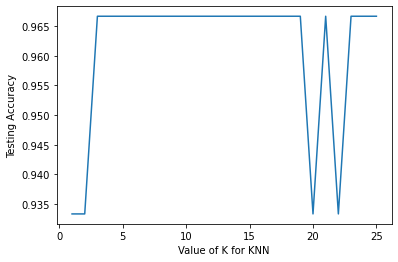

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

K values with 3 to 19 has the same accuracy which is 96.66, so we can use any one value from that, i choose K as 5 and train the model with full training data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [ ]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


## **CLUSTERING**

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#the imported dataset does not have the required column names so lets add it
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=colnames)

menampilkan data

In [ ]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Mengubah nama kelas menjadi kategori numerik untuk analisis.

In [ ]:
irisdata['Class'] = pd.Categorical(irisdata["Class"])
irisdata["Class"] = irisdata["Class"].cat.codes

mempersiapkan kumpulan data

In [ ]:
X = irisdata.values[:, 0:4]
y = irisdata.values[:, 4]

menjalankan k-means

In [ ]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

memeriksa akurasi clustering

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(irisdata['Class'],kmeans.labels_,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.95      0.72      0.82        50

       accuracy                           0.24       150
      macro avg       0.32      0.24      0.27       150
   weighted avg       0.32      0.24      0.27       150

